#Object detection using YoloV8 and pre-trained COCO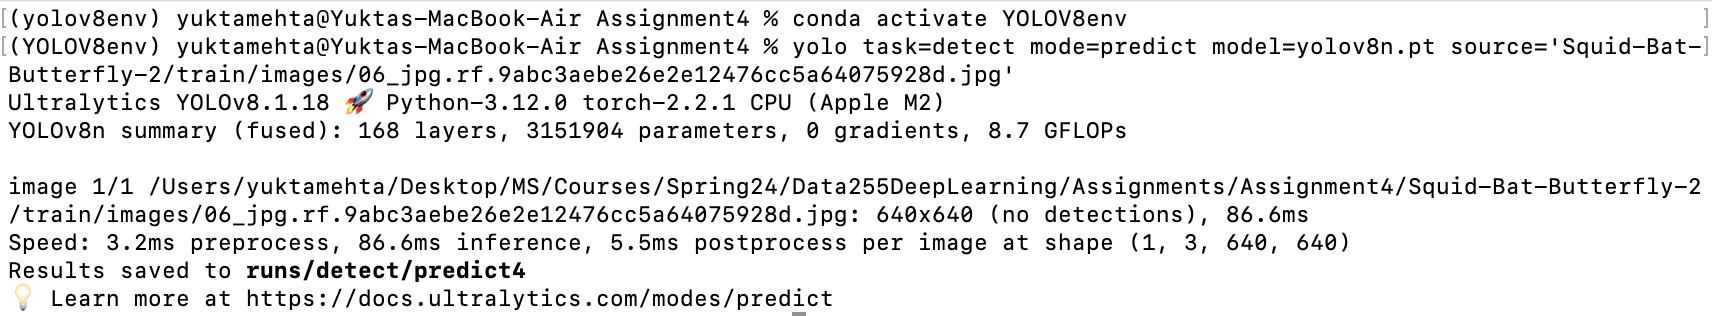 model

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.
https://github.com/ultralytics/ultralytics

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/107.7 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Inference with Pre-trained COCO Model

### 💻 If used via CLI
- Create the environment
- Activate the environment
-  execute the following command to detect the image.( need to change image path accordingly)
yolo task=detect mode=predict model=yolov8n.pt source='Squid-Bat-Butterfly-2/train/images/06_jpg.rf.9abc3aebe26e2e12476cc5a64075928d.jpg'
- TResults saved to runs/detect/predict

💡 Learn more at https://docs.ultralytics.com/modes/predict


In this experiment we are using Squid-bat-butterly images

 https://universe.roboflow.com/yolo-a6y21/squid-bat-butterfly/dataset/2

Downloading the butterfly images

!pip install roboflow

from roboflow import Roboflow

rf = Roboflow(api_key="")

project = rf.workspace("yolo-a6y21").project("squid-bat-butterfly")

dataset = project.version(2).download("yolov8")

Or download and upload to drive


In [5]:
"""!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("yolo-a6y21").project("squid-bat-butterfly")
dataset = project.version(2).download("yolov8")
"""

'!pip install roboflow\n\nfrom roboflow import Roboflow\nrf = Roboflow(api_key="")\nproject = rf.workspace("yolo-a6y21").project("squid-bat-butterfly")\ndataset = project.version(2).download("yolov8")\n'

In [6]:
# Mouting the drive
import os
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
!ls /content/drive/MyDrive/Spring24/DeepLearning/Assignments/Assignment4/SquidBatButterfly/


data.yaml  README.dataset.txt  README.roboflow.txt  runs  test	train  vali  yolov8n.pt  yolov8s.pt


### 🐍 Python SDK

In [8]:
%cd {HOME}
%cd {"drive/MyDrive/Spring24/DeepLearning/Assignments/Assignment4/SquidBatButterfly"}

/content
/content/drive/MyDrive/Spring24/DeepLearning/Assignments/Assignment4/SquidBatButterfly


In [9]:
model = YOLO(f'{HOME}/drive/MyDrive/Spring24/DeepLearning/Assignments/Assignment4/SquidBatButterfly/yolov8n.pt')
results = model.predict(source='train/images/02_jpg.rf.42a8911825715315d1fc976bc4cfdd53.jpg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


In [10]:
results[0].boxes.xyxy


tensor([[ 86., 106., 186., 207.]])

In [11]:
results[0].boxes.conf

tensor([0.31338])

In [12]:
results[0].boxes.cls

tensor([46.])

## Custom Training


In [13]:
!pwd

/content/drive/MyDrive/Spring24/DeepLearning/Assignments/Assignment4/SquidBatButterfly


In [14]:
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=25 imgsz=224 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01,

In [15]:
!ls runs/detect/train/

args.yaml  weights


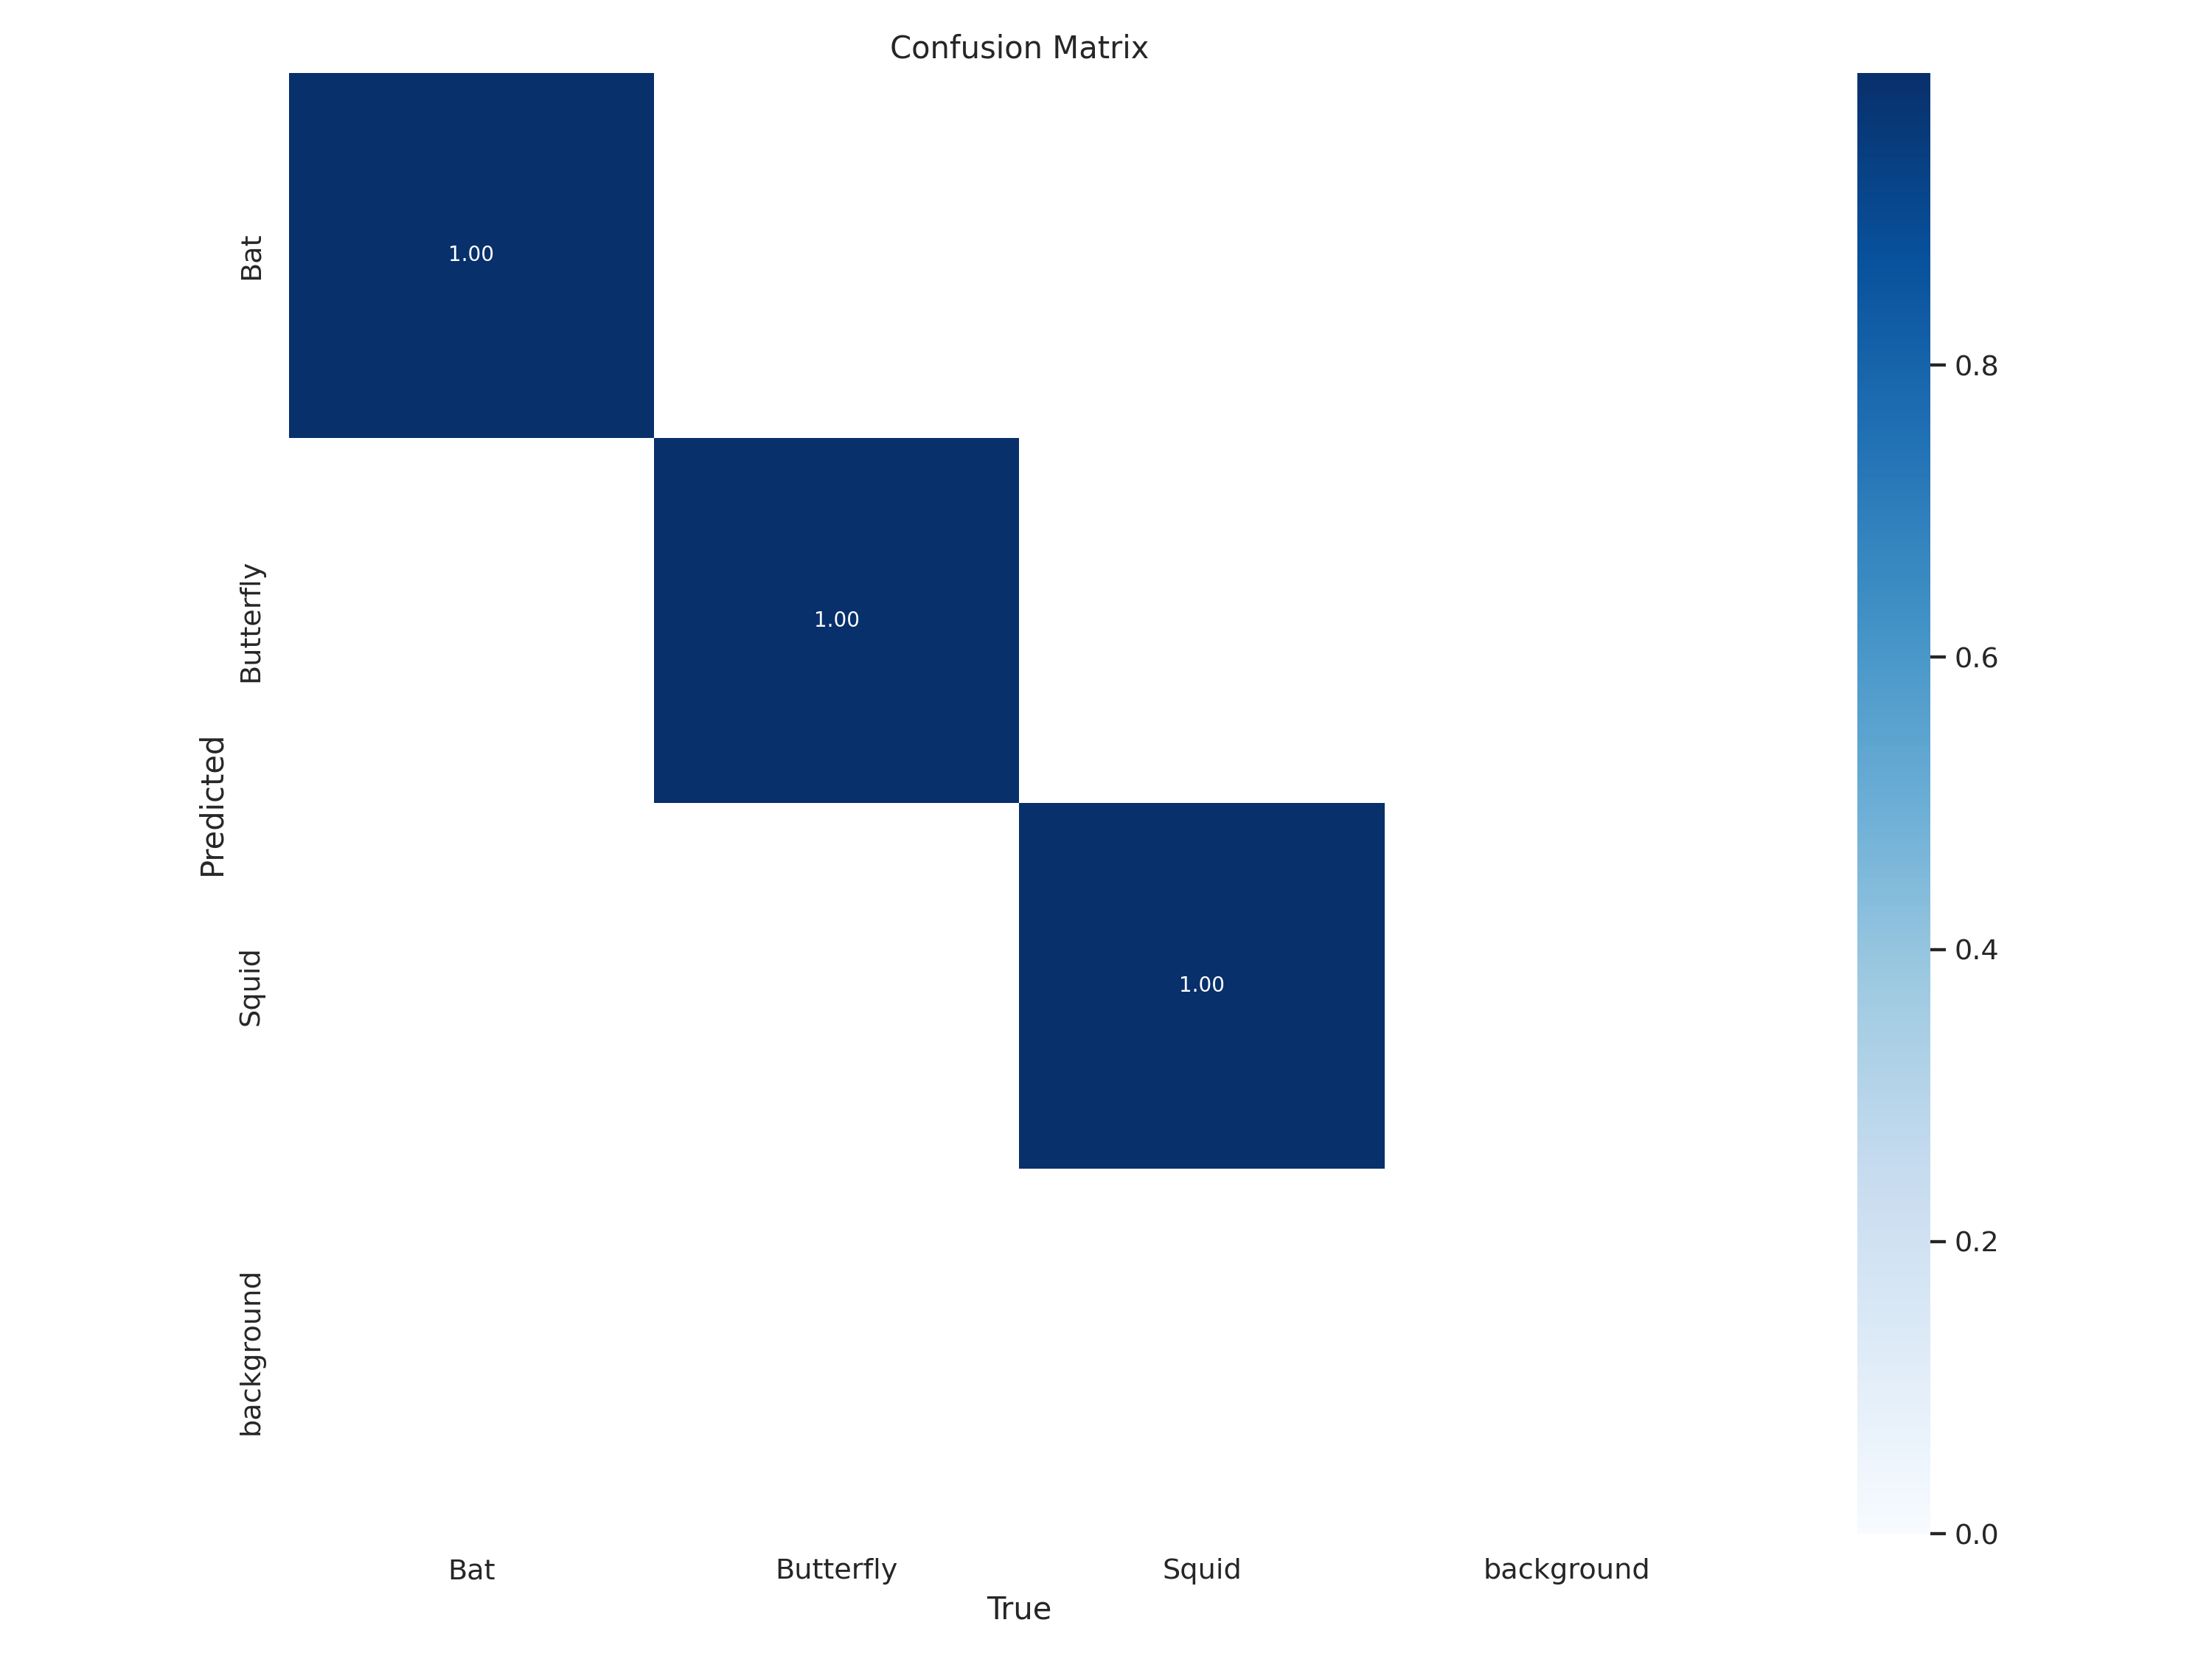

In [16]:
Image(filename='runs/detect/train6/confusion_matrix.png', width=600)

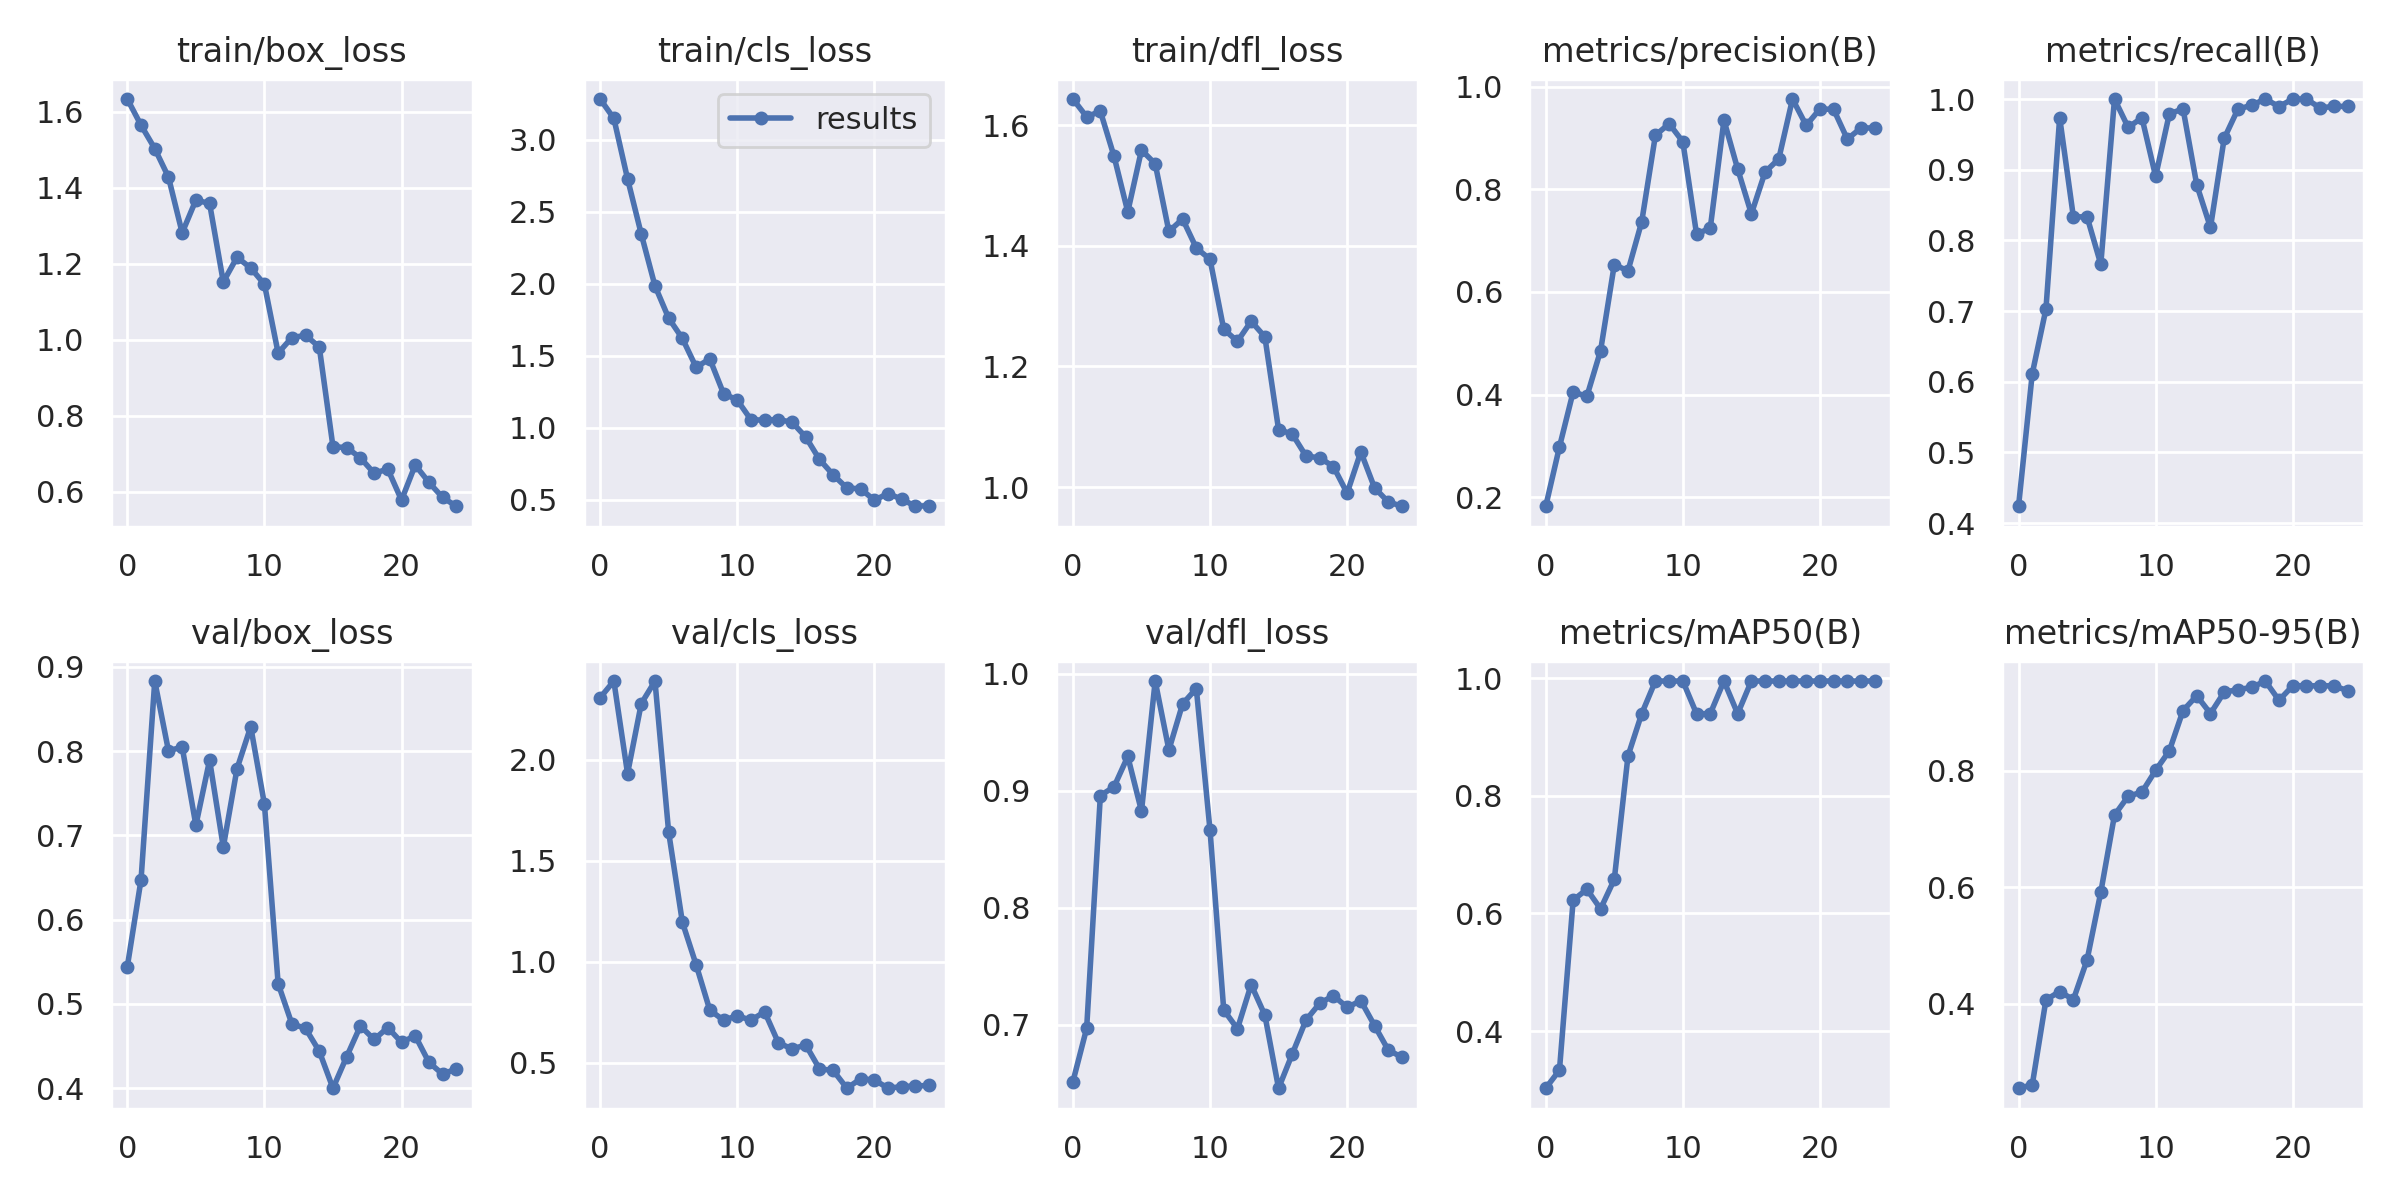

In [17]:
Image(filename='runs/detect/train6/results.png', width=600)

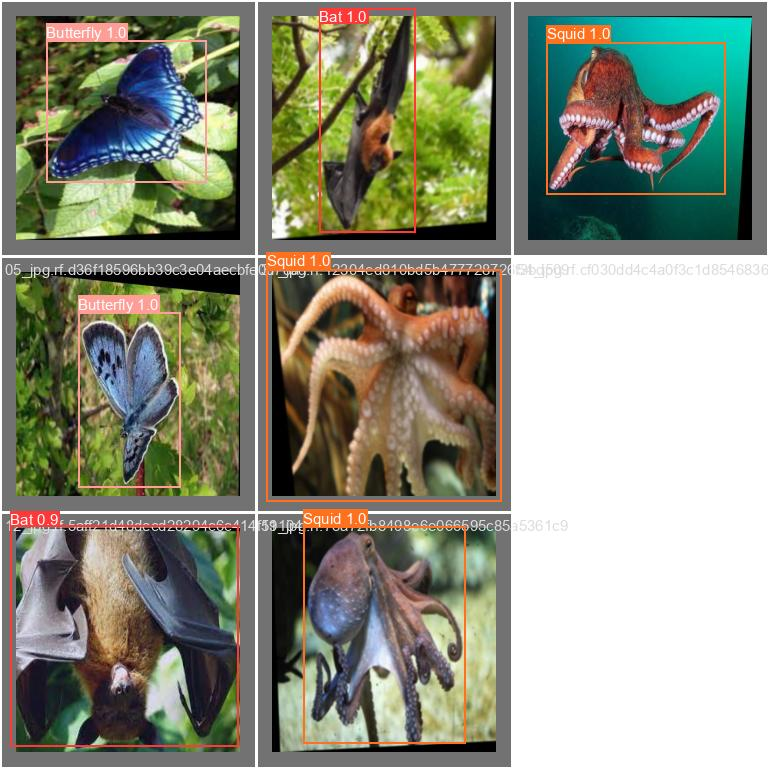

In [18]:
Image(filename='runs/detect/train6/val_batch0_pred.jpg', width=600)

 ## Validate Custom Model

In [19]:
!yolo task=detect mode=val model=runs/detect/train6/weights/best.pt data=data.yaml

2024-02-28 03:23:49.005357: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 03:23:49.005439: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 03:23:49.008920: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-28 03:23:50.555891: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Spring24/DeepLearning/Assignments/Assignment4/SquidBatButter

## Inference with Custom Model

In [20]:
!pwd

/content/drive/MyDrive/Spring24/DeepLearning/Assignments/Assignment4/SquidBatButterfly


In [21]:
!yolo task=detect mode=predict model=runs/detect/train6/weights/best.pt conf=0.25 source=test/images

2024-02-28 03:24:06.571634: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 03:24:06.571697: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 03:24:06.573049: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-28 03:24:08.311002: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/25 /content/drive/MyDrive/Spring24/DeepLearning/Assignments/Assignment4/SquidBatButterfly

In [22]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [23]:
# My predict folder is not getting genrated

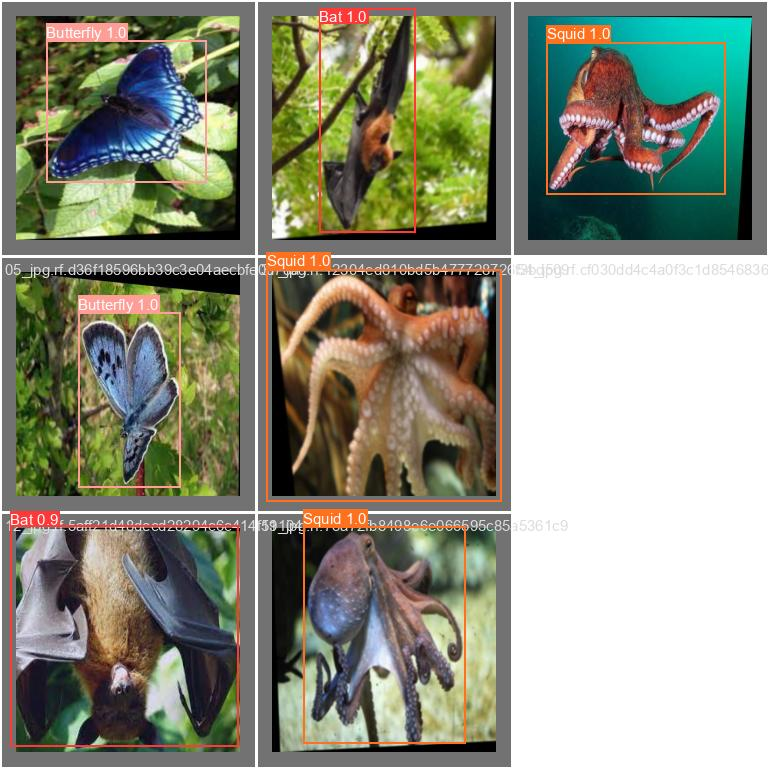

In [24]:
Image(filename='runs/detect/val/val_batch0_pred.jpg', width=600)

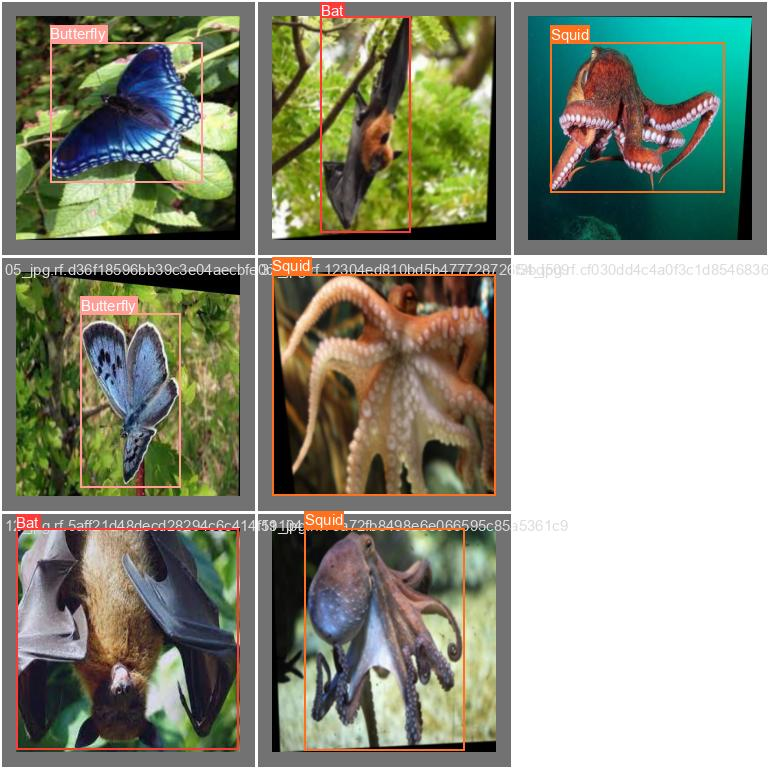

In [25]:
Image(filename='runs/detect/val/val_batch0_labels.jpg', width=600)